# 1. Background Problem

Objective : Data ini merupakan data mining yang berasal dari Google BigQuery, dataset ini berisi tentang credit card. [link](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=zaky-ramdhani&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default) Pada dataset yang digunakan ini saya ingin membuat sebuah model untuk memprediksi pembayaran bulan depan.

# 2. Query SQL

In [3]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "zaky-ramdhani"
client = bigquery.Client(project=project_id)

Authenticated


In [34]:
df = client.query('''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_008_hck.credit-card-information`
WHERE MOD(CUST_ID, 2)=0 #untuk genap
''').to_dataframe()
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


* `CUST_ID` : Identifikasi pemegang kartu kredit
* `BALANCE` : Jumlah uang yang tersisa di akun mereka untuk berbelanja
* `BALANCE_FREQUENCY` : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 - sering diperbarui, 0 - tidak sering diperbarui)
* `PURCHASES` : Jumlah pembelian yang dibuat dari akun
* `ONEOFF_PURCHASES`: Jumlah pembelian maksimum yang dilakukan dalam satu kali transaksi
* `INSTALLMENTS_PURCHASES` : Jumlah pembelian yang dilakukan dengan sistem angsuran
* `CASH_ADVANCE` : Uang muka yang diberikan oleh pengguna
* `PURCHASES_FREQUENCY` : Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 - sering dibeli, 0 - tidak sering dibeli)
* `ONEOFF_PURCHASES_FREQUENCY` : Seberapa sering pembelian dilakukan dalam satu kali transaksi (1 - sering dibeli, 0 - tidak sering dibeli)
* `PURCHASES_INSTALLMENTS_FREQUENCY` : Seberapa sering pembelian dalam bentuk angsuran dilakukan (1 - sering dilakukan, 0 - tidak sering dilakukan)
* `CASH_ADVANCE_FREQUENCY` : Seberapa sering uang muka dibayarkan
* `CASH_ADVANCE_TRX` : Jumlah transaksi yang dilakukan dengan 'Cash in Advance'
* `PURCHASES_TRX` : Jumlah transaksi pembelian yang dilakukan
* `CREDIT_LIMIT` : Batas kartu kredit untuk pengguna
* `PAYMENTS` : Jumlah pembayaran yang dilakukan oleh pengguna
* `MINIMUM_PAYMENTS` : Jumlah pembayaran minimum yang dilakukan oleh pengguna
* `PRC_FULL_PAYMENTS` : Persentase pembayaran penuh yang dibayarkan oleh pengguna
* `TENURE`: Masa pelayanan kartu kredit bagi pengguna

In [35]:
df.to_csv('P1G6_Set_1_zaky_ramdhani.csv')
print('Data Berhasil Disimpan')

Data Berhasil Disimpan


# 3. Import Library

In [2]:
# Untuk membaca dan membuat dataframe
import pandas as pd

# Untuk menghitung perhitungan matematika
import numpy as np

# Untuk membuat visualisasi data pada EDA
import seaborn as sns
import matplotlib.pyplot as plt

#Untuk mengabaikan peringatan pada visualisasi
import warnings
warnings.filterwarnings("ignore")

# Capping Outlier
from feature_engine.outliers import Winsorizer

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Dimentional Reduction
from sklearn.decomposition import PCA

# Clustering dengan Elbow Method
from sklearn.cluster import KMeans

# Silhouette Plot
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

# Save Model
import pickle

# 4. Data Loading

In [2]:
# meload atau membaca file csv
data = pd.read_csv('P1G6_Set_1_zaky_ramdhani.csv')

In [3]:
# menampilkan 10 entry data dari atas
data.head(10)

,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [4]:
# menampilkan 10 entry data dari bawah
data.tail(10)

,Unnamed: 0,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [5]:
# melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        4475 non-null   int64  
 1   CUST_ID                           4475 non-null   int64  
 2   BALANCE                           4475 non-null   float64
 3   BALANCE_FREQUENCY                 4475 non-null   float64
 4   PURCHASES                         4475 non-null   float64
 5   ONEOFF_PURCHASES                  4475 non-null   float64
 6   INSTALLMENTS_PURCHASES            4475 non-null   float64
 7   CASH_ADVANCE                      4475 non-null   float64
 8   PURCHASES_FREQUENCY               4475 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 10  PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 11  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 12  CASH_A

In [6]:
# melihat jumlah unique pada setiap kolom 
data.nunique()

Unnamed: 0                          4475
CUST_ID                             4475
BALANCE                             4439
BALANCE_FREQUENCY                     42
PURCHASES                           3218
ONEOFF_PURCHASES                    2073
INSTALLMENTS_PURCHASES              2357
CASH_ADVANCE                        2155
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         153
PAYMENTS                            4350
MINIMUM_PAYMENTS                    4317
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [7]:
# melihat jumlah NAN
data.isnull().sum()

Unnamed: 0                            0
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# melihat jumlah data yang duplikat
data.duplicated().sum()

0

In [14]:
# menduplikat data original
new_data = data.copy()

In [15]:
# menghitung persentase pada kolom yang memiliki nilai NAN
persentase_mv_credit = 100 * new_data["CREDIT_LIMIT"].isnull().sum()/len(new_data)
persentase_mv_minpay = 100 * new_data["MINIMUM_PAYMENTS"].isnull().sum()/len(new_data)
print (f"Persentase Missing Value 'Credit Limit'     : {persentase_mv_credit:.2f}%")
print (f"Persentase Missing Value 'Minimum Payments' : {persentase_mv_minpay:.2f}%")

Persentase Missing Value 'Credit Limit'     : 0.02%
Persentase Missing Value 'Minimum Payments' : 3.53%


Ternyata setelah dilihat missing value tersebut persentasenya kurang dari 5% saya akan drop missing value.

In [16]:
new_data = new_data.dropna()

In [17]:
new_data.isnull().sum()

Unnamed: 0                          0
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
# menghapus kolom yang tidak memiliki informasi
new_data = new_data.drop(['Unnamed: 0', 'CUST_ID'],axis=1)

In [19]:
# mengubah nama kolom supaya memudahkan saat memanggil
new_data.rename(columns = {'BALANCE' : 'bal', 'BALANCE_FREQUENCY' : 'bf', 'PURCHASES' : 'pur',
       'ONEOFF_PURCHASES' : 'op', 'INSTALLMENTS_PURCHASES' : 'ip', 'CASH_ADVANCE' : 'ca',
       'PURCHASES_FREQUENCY' : 'pf', 'ONEOFF_PURCHASES_FREQUENCY' : 'opf',
       'PURCHASES_INSTALLMENTS_FREQUENCY' : 'pif', 'CASH_ADVANCE_FREQUENCY' : 'caf',
       'CASH_ADVANCE_TRX' : 'cat', 'PURCHASES_TRX' : 'pt', 'CREDIT_LIMIT' : 'cl', 'PAYMENTS' : 'pay',
       'MINIMUM_PAYMENTS' : 'mp', 'PRC_FULL_PAYMENT' : 'pfp', 'TENURE' : 'ten'}, inplace = True)

In [20]:
# melihat nama - nama kolom
new_data.columns

Index(['bal', 'bf', 'pur', 'op', 'ip', 'ca', 'pf', 'opf', 'pif', 'caf', 'cat',
       'pt', 'cl', 'pay', 'mp', 'pfp', 'ten'],
      dtype='object')

In [21]:
new_data.describe()

,bal,bf,pur,op,ip,ca,pf,opf,pif,caf,cat,pt,cl,pay,mp,pfp,ten
count,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000
mean,1600.114511,0.895236,1025.274057,600.770438,424.888909,986.980658,0.495675,0.205447,0.369805,0.136236,3.252549,14.801900,4524.431479,1785.801612,854.624165,0.162997,11.531511
std,2107.347942,0.206730,2241.729131,1690.105736,940.627467,2159.134558,0.399564,0.299252,0.398217,0.200511,6.576772,24.473182,3688.856008,2997.093142,2306.642962,0.299700,1.324580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,4.841543,0.037744,0.000000,6.000000
25%,152.877191,0.909091,44.662500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,427.905948,169.878606,0.000000,12.000000
50%,916.693628,1.000000,379.300000,35.955000,95.845000,0.000000,0.500000,0.083333,0.181818,0.000000,0.000000,7.000000,3000.000000,874.442322,309.983200,0.000000,12.000000
75%,2112.447004,1.000000,1149.940000,600.000000,498.592500,1110.248526,0.916667,0.333333,0.750000,0.250000,4.000000,17.000000,6500.000000,1954.888216,830.656813,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


# 5. Exploratory Data Analysis (EDA)

### Bagaimana distribusi CASH ADVANCE pada dataset ini? Berapa jumlah rata-rata yang diberikan oleh pengguna?

In [22]:
ca_category = new_data.copy()

In [23]:
# mengelompokkan data
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]

ca_category['cash_advance_category'] = pd.cut(ca_category['ca'], bins=bins, labels=['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000'])

In [24]:
mean_ca = ca_category['ca'].mean().round()
print("Rata-rata Uang Muka(Cash Advance) yang disetorkan pengguna :", mean_ca)

Rata-rata Uang Muka(Cash Advance) yang disetorkan pengguna : 987.0


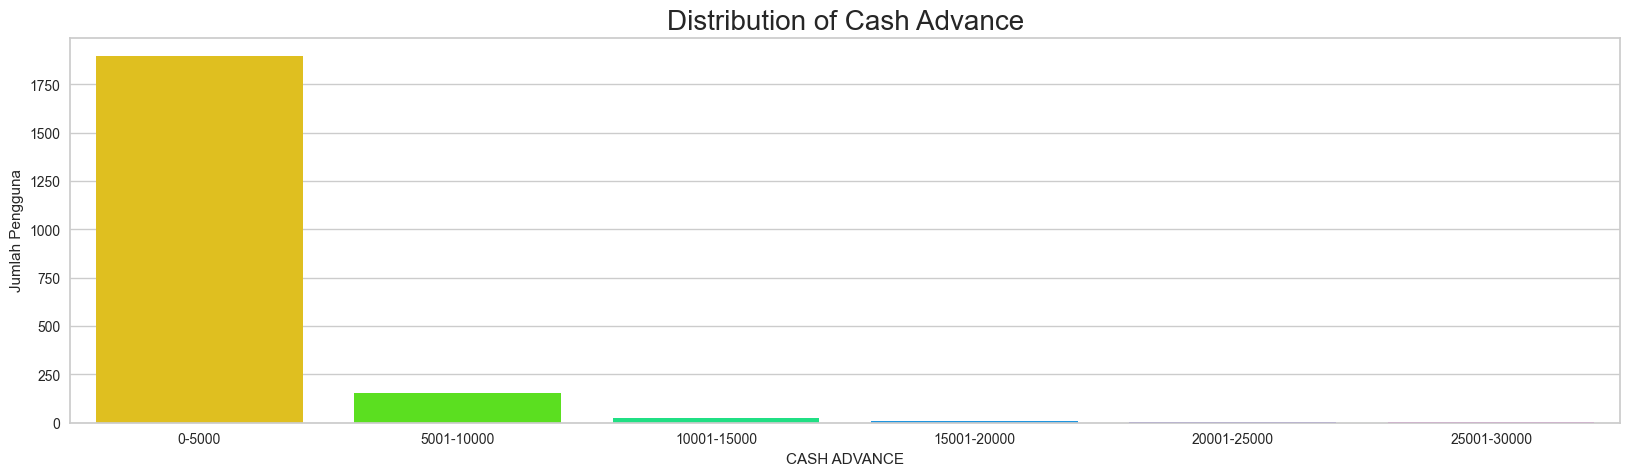

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(x=ca_category['cash_advance_category'], palette = 'hsv')
plt.title('Distribution of Cash Advance', fontsize = 20)
plt.xlabel("CASH ADVANCE")
plt.ylabel("Jumlah Pengguna")
plt.show()

*Kesimpulan*
* Kebanyakan orang menyetorkan uangnya pada rentang 0-5000$ dan rata - rata uang muka yang disetorkan yaitu 987$

### Berapa rata-rata jumlah PEMBELIAN ANGSURAN(Installments Purchases)?

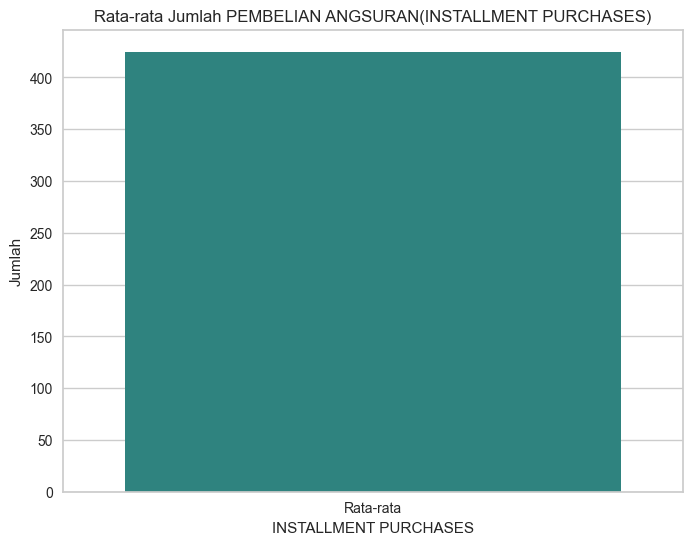

In [26]:
mean_installments_purchases = new_data['ip'].mean()

# Membuat barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Rata-rata'], y=[mean_installments_purchases], palette='viridis')
plt.xlabel("INSTALLMENT PURCHASES")
plt.ylabel("Jumlah")
plt.title("Rata-rata Jumlah PEMBELIAN ANGSURAN(INSTALLMENT PURCHASES)")
plt.show()

In [27]:
print(f'Rata - Rata Jumlah Pembelian Angsuran   : {mean_installments_purchases:2f}$')

Rata - Rata Jumlah Pembelian Angsuran   : 424.888909$


*Kesimpulan*
*  Berdasarkan nilai rata-rata jumlah PEMBELIAN ANGSURAN sebesar 424.888909$, kita dapat menyimpulkan bahwa kebiasaan pengguna berbelanja dalam bentuk angsuran dengan rata-rata pembelian sekitar 424.888909$

### Apakah saldo(Balance) yang dimiliki pengguna mempunyai hubungan dengan batas kredit(Credit Limit)?

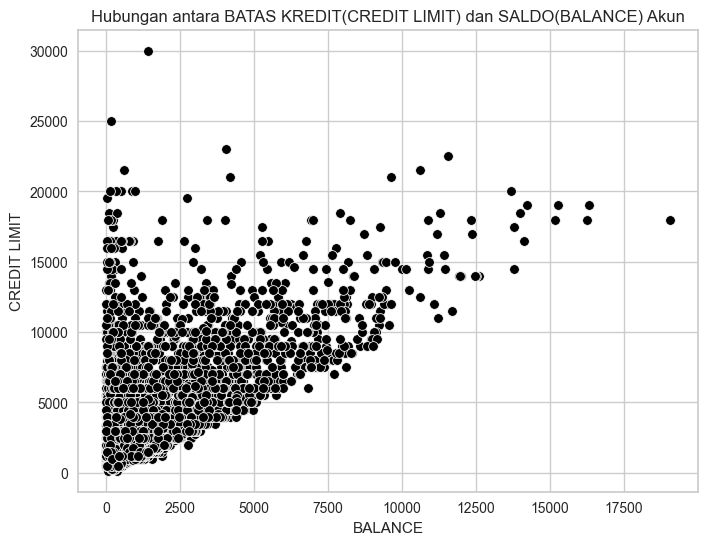

In [28]:
# Membuat scatterplot dengan Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bal', y='cl', data=new_data, color='black')
plt.xlabel("BALANCE")
plt.ylabel("CREDIT LIMIT")
plt.title("Hubungan antara BATAS KREDIT(CREDIT LIMIT) dan SALDO(BALANCE) Akun")
plt.show()

*Kesimpulan*
* Kebanyakan orang yang memiliki saldo dibawah 5000$ mempunyai batas kredit dibawah 10000$, walaupun memiliki saldo yang tidak cukup besar tetapi ada pula orang yang memiliki batas kredit sehingga saldo tidak memiliki hubungan dengan batas kredit

### Berapa rata-rata dan nilai maksimum dari PEMBELIAN SEKALIGUS(Oneoff Purchase)?

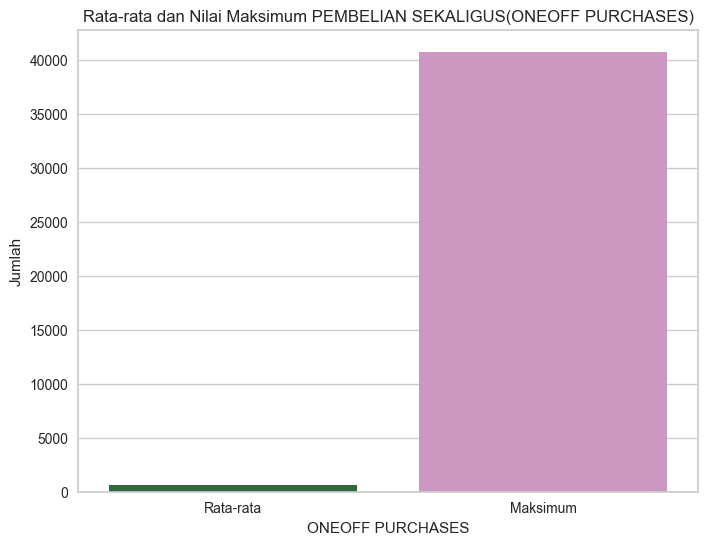

In [29]:
# Menghitung rata-rata dan nilai maksimum PEMBELIAN SEKALIGUS
mean_oneoff_purchases = new_data['op'].mean()
max_oneoff_purchases = new_data['op'].max()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Rata-rata', 'Maksimum'], y=[mean_oneoff_purchases, max_oneoff_purchases], palette='cubehelix')

plt.xlabel("ONEOFF PURCHASES")
plt.ylabel("Jumlah")
plt.title("Rata-rata dan Nilai Maksimum PEMBELIAN SEKALIGUS(ONEOFF PURCHASES)")

plt.show()


In [30]:
print(f'Rata - Rata Pembelian Sekaligus      : {mean_oneoff_purchases:2f}$')
print(f'Nilai Maksimum Pembelian Sekaligus   : {max_oneoff_purchases:.2f}$')

Rata - Rata Pembelian Sekaligus      : 600.770438$
Nilai Maksimum Pembelian Sekaligus   : 40761.25$


*Kesimpulan*
* Dalam satu transaksi rata - rata kebiasaan pengguna berbelanja 600.770438$ dan nilai maksimum pengguna pernah berbelanja sampai 40761$

### Apakah ada hubungan antara TENURE (Masa pelayanan kartu kredit) dan pola penggunaan kartu kredit?

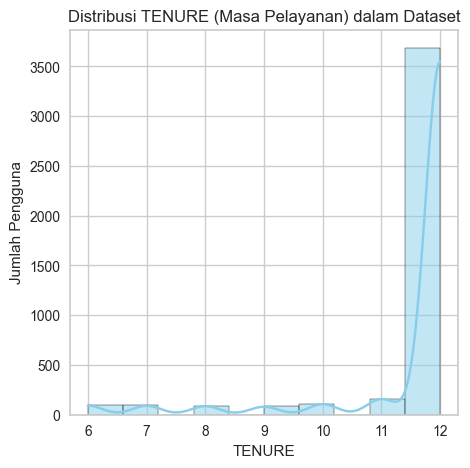

In [31]:
plt.figure(figsize=(5, 5))
sns.histplot(new_data['ten'], bins=10, kde=True, color='skyblue')
plt.xlabel("TENURE")
plt.ylabel("Jumlah Pengguna")
plt.title("Distribusi TENURE (Masa Pelayanan) dalam Dataset")
plt.show()

In [32]:
new_data.query('ten==12')

,bal,bf,pur,op,ip,ca,pf,opf,pif,caf,cat,pt,cl,pay,mp,pfp,ten
9,0.004816,0.545455,51.70,0.00,51.70,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,3000.0,33.249088,0.059481,0.000000,12
10,867.728471,1.000000,41.07,0.00,41.07,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,3000.0,1409.282903,233.788637,0.000000,12
11,41.255670,0.454545,297.40,297.40,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,5,6000.0,595.460601,173.255085,0.333333,12
12,857.767403,1.000000,639.56,0.00,639.56,0.000000,0.250000,0.000000,0.250000,0.000000,0,4,2200.0,210.272469,254.976679,0.000000,12
13,5850.172900,1.000000,393.87,0.00,393.87,0.000000,0.250000,0.000000,0.250000,0.000000,0,8,6000.0,1536.774213,2668.340809,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4443,7907.725211,1.000000,1685.19,1552.31,132.88,8253.390661,0.833333,0.750000,0.166667,0.416667,14,27,18500.0,19841.257370,2025.836483,0.090909,12
4444,6467.885013,1.000000,1464.14,978.71,485.43,3947.867840,0.833333,0.583333,0.666667,0.416667,10,23,11500.0,1658.563509,1887.413517,0.000000,12
4445,5311.078831,1.000000,1349.62,887.94,461.68,4258.489193,0.833333,0.750000,0.833333,0.416667,13,21,6000.0,2212.652278,2429.739931,0.000000,12
4446,1871.597836,1.000000,3220.25,208.49,3011.76,2367.006699,0.833333,0.166667,0.750000,0.416667,15,28,5500.0,448.564207,559.391166,0.000000,12


*Kesimpulan*
* terdapat pola yang sama antara jangka waktu 6-11 bulan dibawah 500 pengguna, tetapi kenaikan begitu signifikan dengan jangka waktu 12 bulan yang diberikan kepada pengguna diatas 3500 pengguna

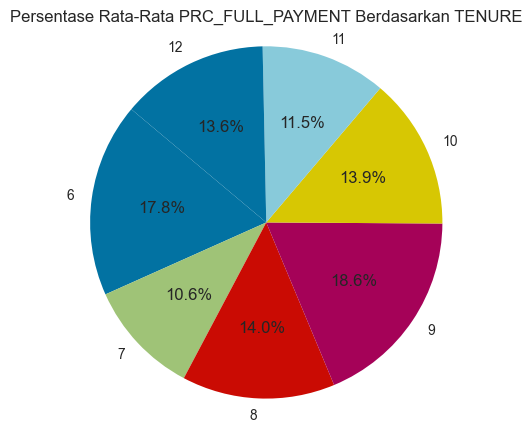

In [33]:
mean_payments_by_tenure = new_data.groupby('ten')['pfp'].mean()

labels = mean_payments_by_tenure.index
sizes = mean_payments_by_tenure.values
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Rata-Rata PRC_FULL_PAYMENT Berdasarkan TENURE')
plt.axis('equal')
plt.show()

*Kesimpulan*
* Terlihat bahwa pengguna yang lebih sering membayar penuh jumlah tagihan mereka pada tenure 9 bulan dengan persentase 18.6% dibandingkan dengan tenure lain.

# 6. Feature Engineering

## Pre-processing

### a. Handling Outlier

In [34]:
cols = new_data.copy()
# Menghapus kolom yang tidak diperlukan
outlier = cols.drop(columns = ['ten'])

In [35]:
# Melihat persentase outlier

# Pengecekan persentase data outlier
for i in outlier.columns:
    skew = outlier[i].skew()
    if skew >0.5 and skew <= 1:

        q1 = outlier[i].quantile(0.25)
        q3 = outlier[i].quantile(0.75)
        iqr = q3-q1

        upper_boundary = q3 + (1.5*iqr)
        lower_boundary = q1 - (1.5*iqr)

    elif skew >1 :

        q1 = outlier[i].quantile(0.25)
        q3 = outlier[i].quantile(0.75)
        iqr = q3-q1

        upper_boundary = q3 + (3*iqr)
        lower_boundary = q1 - (3*iqr)
        
    outliers = outlier[(outlier[i]>upper_boundary)|((outlier[i]<lower_boundary))]
    persen_outlier = len(outliers)/len(outlier)*100

    print(f"Persentase outlier dari kolom {i} adalah : {persen_outlier:.2f}%")

Persentase outlier dari kolom bal adalah : 2.20%
Persentase outlier dari kolom bf adalah : 0.00%
Persentase outlier dari kolom pur adalah : 4.01%
Persentase outlier dari kolom op adalah : 5.95%
Persentase outlier dari kolom ip adalah : 4.05%
Persentase outlier dari kolom ca adalah : 5.51%
Persentase outlier dari kolom pf adalah : 0.00%
Persentase outlier dari kolom opf adalah : 0.00%
Persentase outlier dari kolom pif adalah : 0.00%
Persentase outlier dari kolom caf adalah : 0.05%
Persentase outlier dari kolom cat adalah : 4.12%
Persentase outlier dari kolom pt adalah : 3.87%
Persentase outlier dari kolom cl adalah : 0.09%
Persentase outlier dari kolom pay adalah : 4.40%
Persentase outlier dari kolom mp adalah : 4.63%
Persentase outlier dari kolom pfp adalah : 10.68%


In [36]:
data_normal = []
data_skew = []

for i in outlier :
    skew = cols[i].skew()
    
    if (skew >=0.5) | (skew <=-0.5):
        data_skew.append(i)

    elif (skew <0.5) & (skew >=-0.5):
        data_normal.append(i)

    print(f"Skewness dari {i} adalah : {skew:.2f}" )

Skewness dari bal adalah : 2.44
Skewness dari bf adalah : -2.08
Skewness dari pur adalah : 8.90
Skewness dari op adalah : 10.05
Skewness dari ip adalah : 8.03
Skewness dari ca adalah : 4.71
Skewness dari pf adalah : 0.04
Skewness dari opf adalah : 1.49
Skewness dari pif adalah : 0.49
Skewness dari caf adalah : 1.79
Skewness dari cat adalah : 4.72
Skewness dari pt adalah : 4.43
Skewness dari cl adalah : 1.53
Skewness dari pay adalah : 5.99
Skewness dari mp adalah : 12.36
Skewness dari pfp adalah : 1.85


Karena rows data tidak terlalu banyak saya memutuskan untuk melakukan handling outlier dengan capping.Karena saya tidak ingin kehilangan informasi dari keseluruhan data yang saya punya.

#### Censoring or Capping 

#### - Distribusi Normal

Kita mempunyai data dengan variabel  data_normal yang berdistribusi normal.Kita bisa melakukan capping dengan metode gaussian karena distribusi datanya normal.

In [37]:
print(f'Data Normal     :{data_normal}')

Data Normal     :['pf', 'pif']


In [39]:
# Handling outlier dengan menggunakan metode caping gaussian untuk data yang berdistribusi normal
capping_norm = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables= data_normal)

capping_norm = capping_norm.fit_transform(new_data[data_normal])

In [40]:
print('Distribusi Normal Setelah Capping: ')
print(capping_norm.skew())

Distribusi Normal Setelah Capping: 
pf     0.035642
pif    0.486577
dtype: float64


#### - Distribusi Skewed

Kita mempunyai data dengan variabel data_skew yang berdistribusi tidak normal.Kita bisa melakukan capping dengan metode iqr karena distribusi datanya tidak normal.

In [41]:
print(f'Data Skewness   :{data_skew}')

Data Skewness   :['bal', 'bf', 'pur', 'op', 'ip', 'ca', 'opf', 'caf', 'cat', 'pt', 'cl', 'pay', 'mp', 'pfp']


In [42]:
# Handling outlier dengan menggunakan metode caping iqr
capping_skew = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables= data_skew,
                             missing_values='ignore')

capping_skew = capping_skew.fit_transform(new_data[data_skew])

In [43]:
print('Distribusi Skewness Setelah Capping: ')
print(capping_skew.skew())

Distribusi Skewness Setelah Capping: 
bal    1.755424
bf    -1.432554
pur    1.797555
op     1.723017
ip     1.769336
ca     1.711069
opf    1.494505
caf    1.773797
cat    1.765607
pt     1.742907
cl     1.468192
pay    1.748119
mp     1.780386
pfp    1.524826
dtype: float64


In [44]:
# Menggabungkan data normal dan tidak normal yang sudah di capping untuk kita scaling
concat_capping = pd.concat([capping_norm,capping_skew, cols['ten']],axis = 1)
concat_capping.head()

,pf,pif,bal,bf,pur,op,ip,ca,opf,caf,cat,pt,cl,pay,mp,pfp,ten
1,0.125,0.0,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
3,0.125,0.0,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,0.125,0.0,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,0.125,0.0,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
7,0.125,0.0,424.994385,0.636364,1200.0,1200.0,0.0,0.0,0.125,0.0,0,1,1200.0,57.266292,56.720210,0.0,8


*Kesimpulan*
* Berdasarkan hasil skewness data di atas, masih banyak data yang memiliki nilai skew < 0,5 atau > 0,5 yang artinya data masih tidak normal (skewed).

### b. Handling Missing Value

In [45]:
concat_capping.isna().sum()

pf     0
pif    0
bal    0
bf     0
pur    0
op     0
ip     0
ca     0
opf    0
caf    0
cat    0
pt     0
cl     0
pay    0
mp     0
pfp    0
ten    0
dtype: int64

In [112]:
# # Handle NULL Values : Replace with Median Values
# concat_capping['mp'].fillna(concat_capping['mp'].median(), inplace=True)
# concat_capping['cl'].fillna(concat_capping['cl'].median(), inplace=True)

### c. Feature Scaling

In [46]:
# melakukan scaling pada data
scale = MinMaxScaler()
scaling = scale.fit_transform(concat_capping)

### d. Dimentional Reduction

In [47]:
# reduksi dimensi dengan PCA
pca = PCA()
pca.fit(scaling)

PCA()

Text(0, 0.5, 'Eigenvalues')

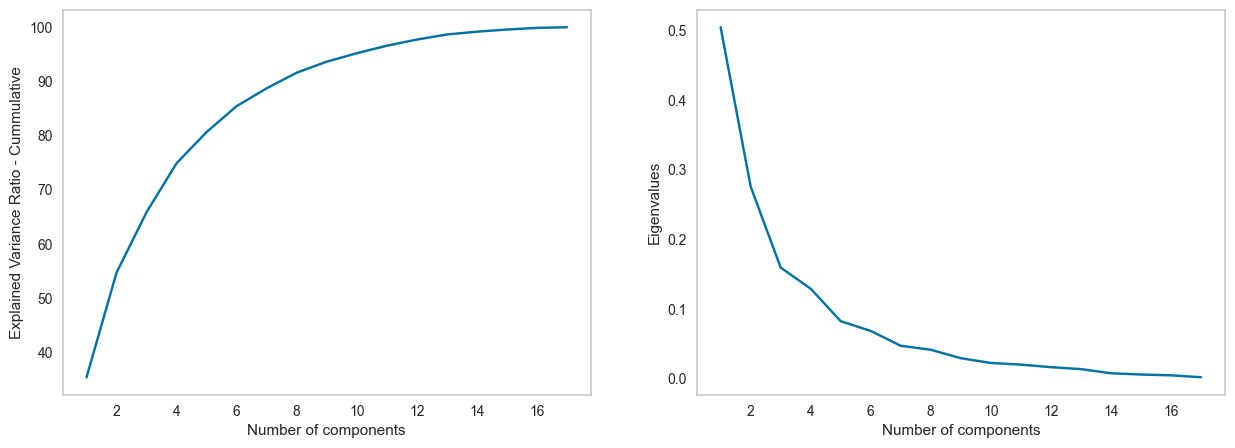

In [48]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [49]:
# Check the number of features if we want to retain 95 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

In [50]:
# Let's train the model with 95 % of the original dataset information
pca = PCA(n_components=10)
pca.fit(scaling)

scaling_pca = pca.transform(scaling)

Pada proses pca kita bisa menentukan treshold yang akan kita pakai untuk informasi dari data yang kita butuhkan. Disini saya memutuskan untuk mengambil treshold 95% yang nantinya akan mereduksi data dari 16 kolom menjadi 10 kolom.

# 7. Model Definition

- Teknik Elbow Method

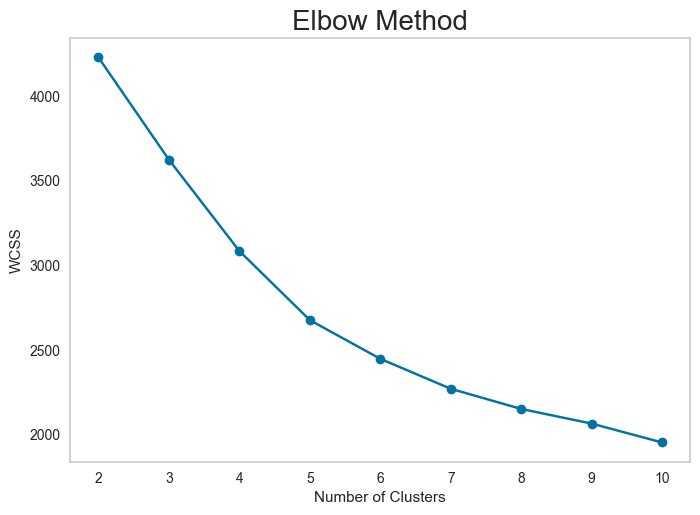

In [51]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(scaling_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari hasil visualisasi diatas sekilas kita mendapatkan nilai k=5, dimana penurunan inersianya tidak lagi signifikan setelah nilai k=5

- Teknik Silhoutte Plot & Silhoutte Score

In [52]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.2738013651374268
For n_clusters = 3 The average silhouette_score is : 0.24572341668493064
For n_clusters = 4 The average silhouette_score is : 0.2619015719995988
For n_clusters = 5 The average silhouette_score is : 0.2609966989849618
For n_clusters = 6 The average silhouette_score is : 0.26523960265218244
For n_clusters = 7 The average silhouette_score is : 0.2598076534690168
For n_clusters = 8 The average silhouette_score is : 0.2599846279470616
For n_clusters = 9 The average silhouette_score is : 0.264872761836979


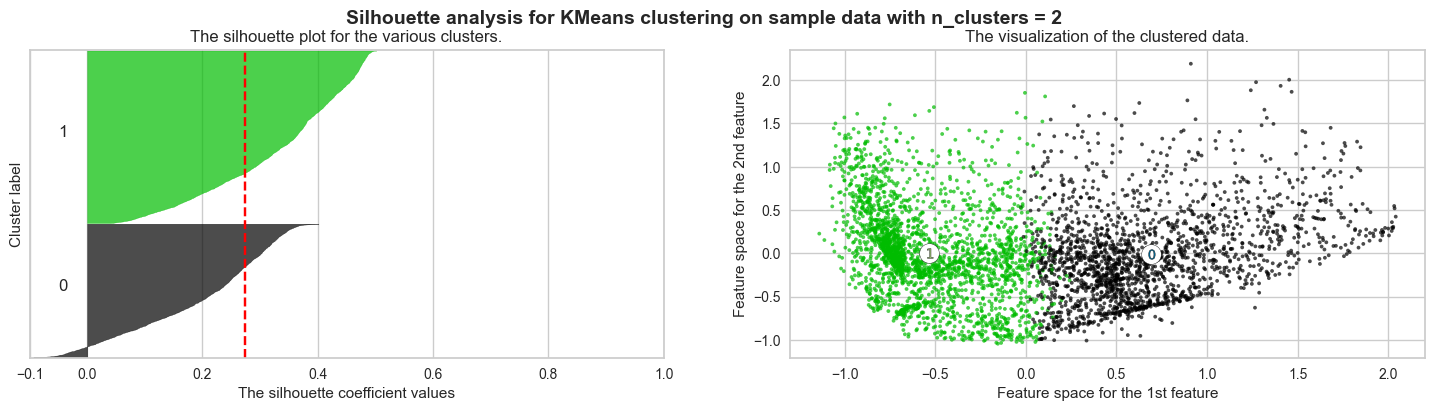

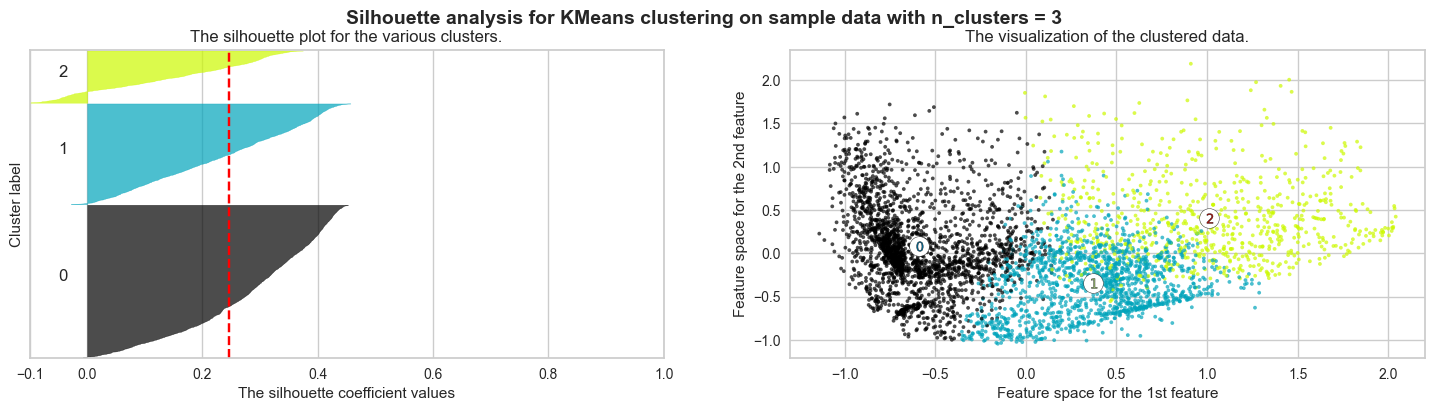

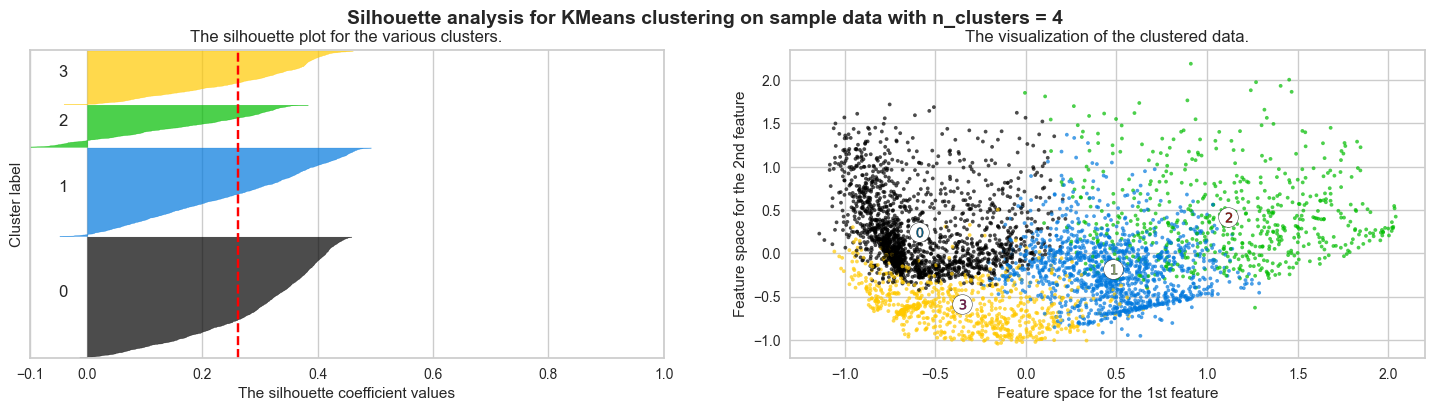

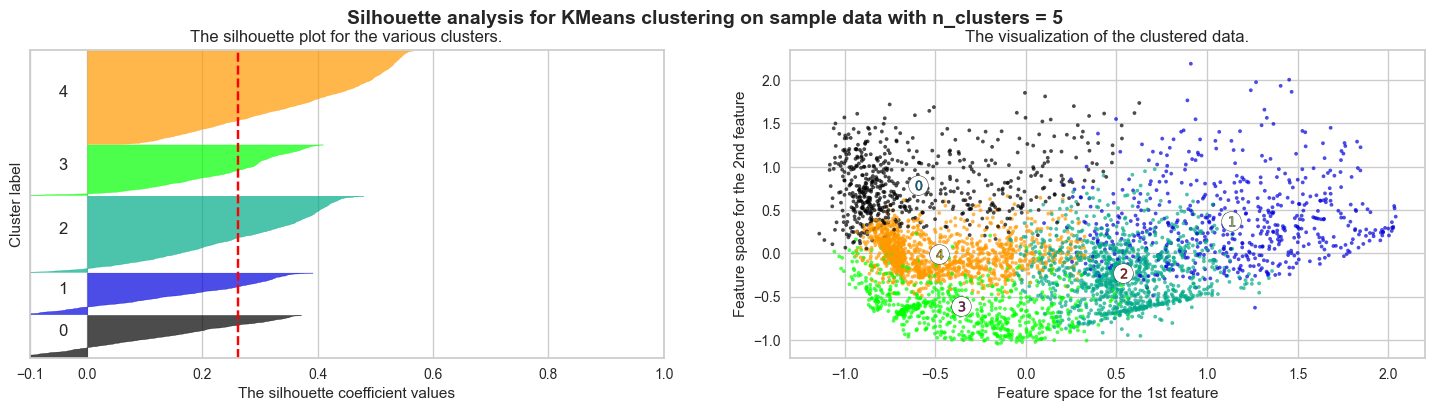

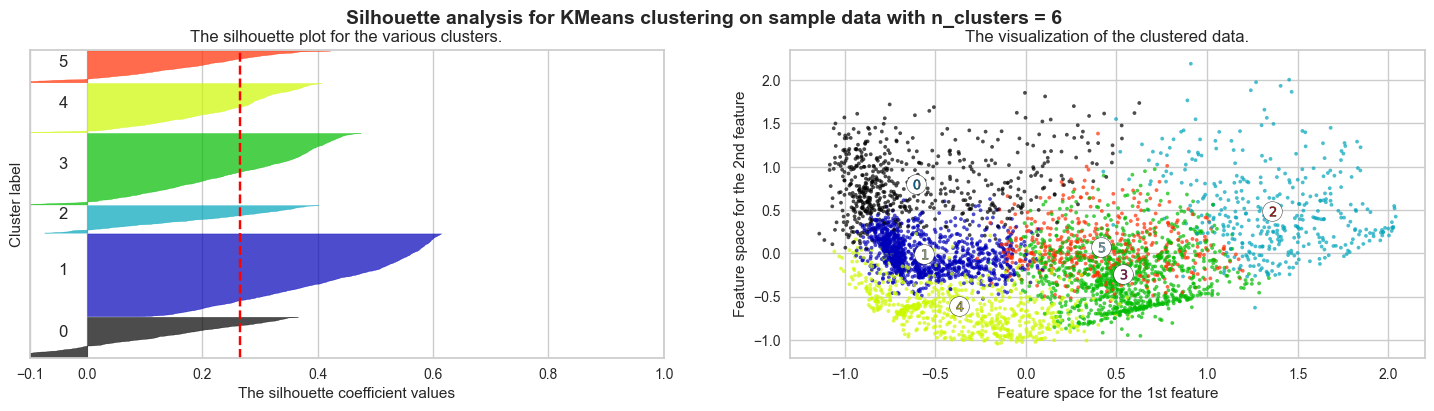

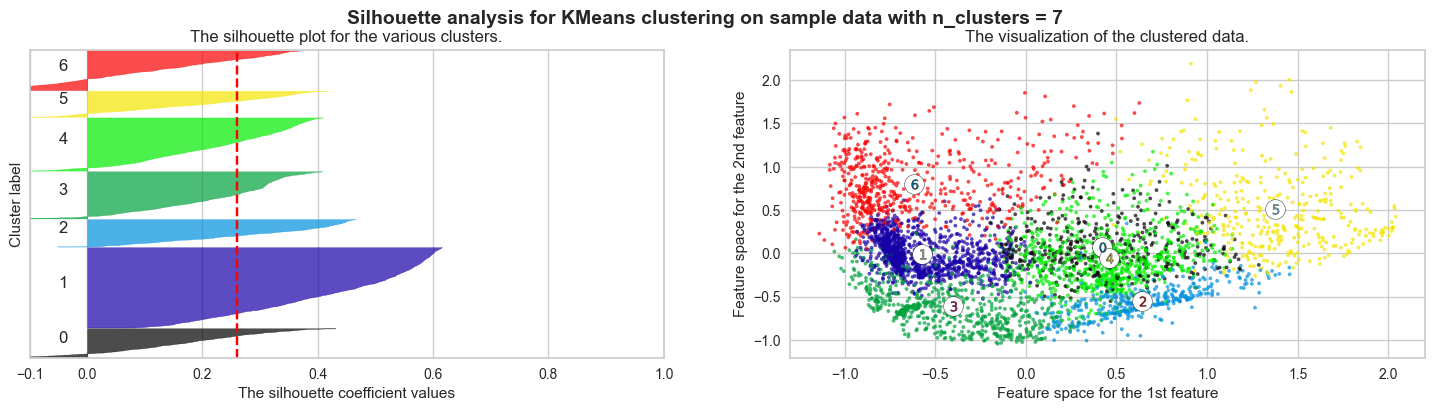

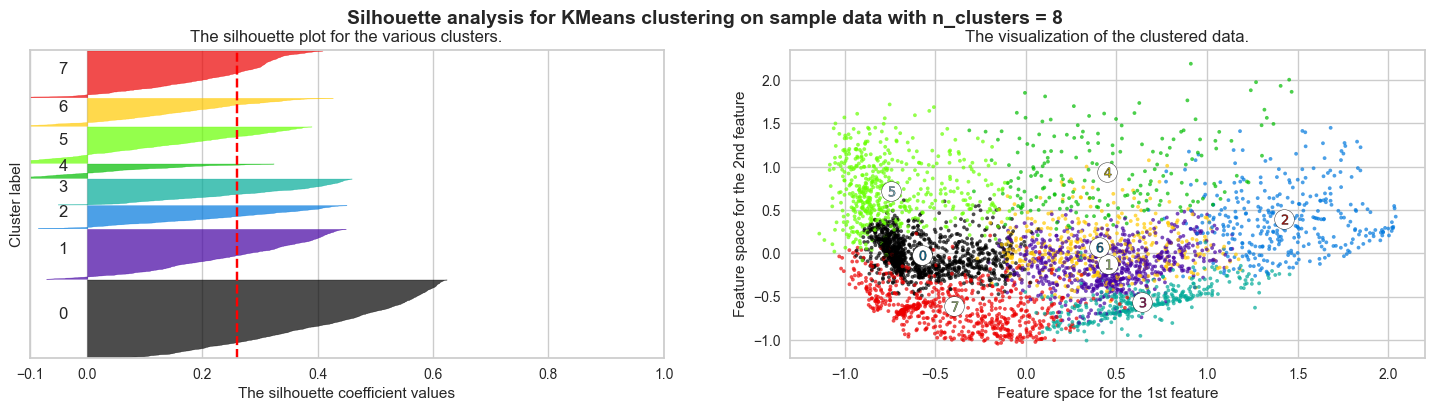

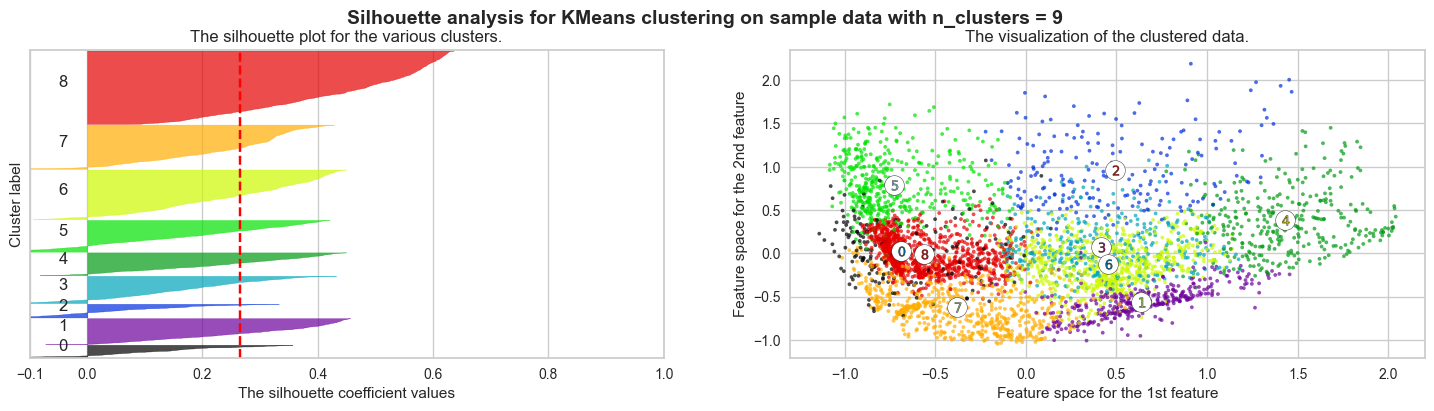

In [53]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), scaling_pca, random_state)

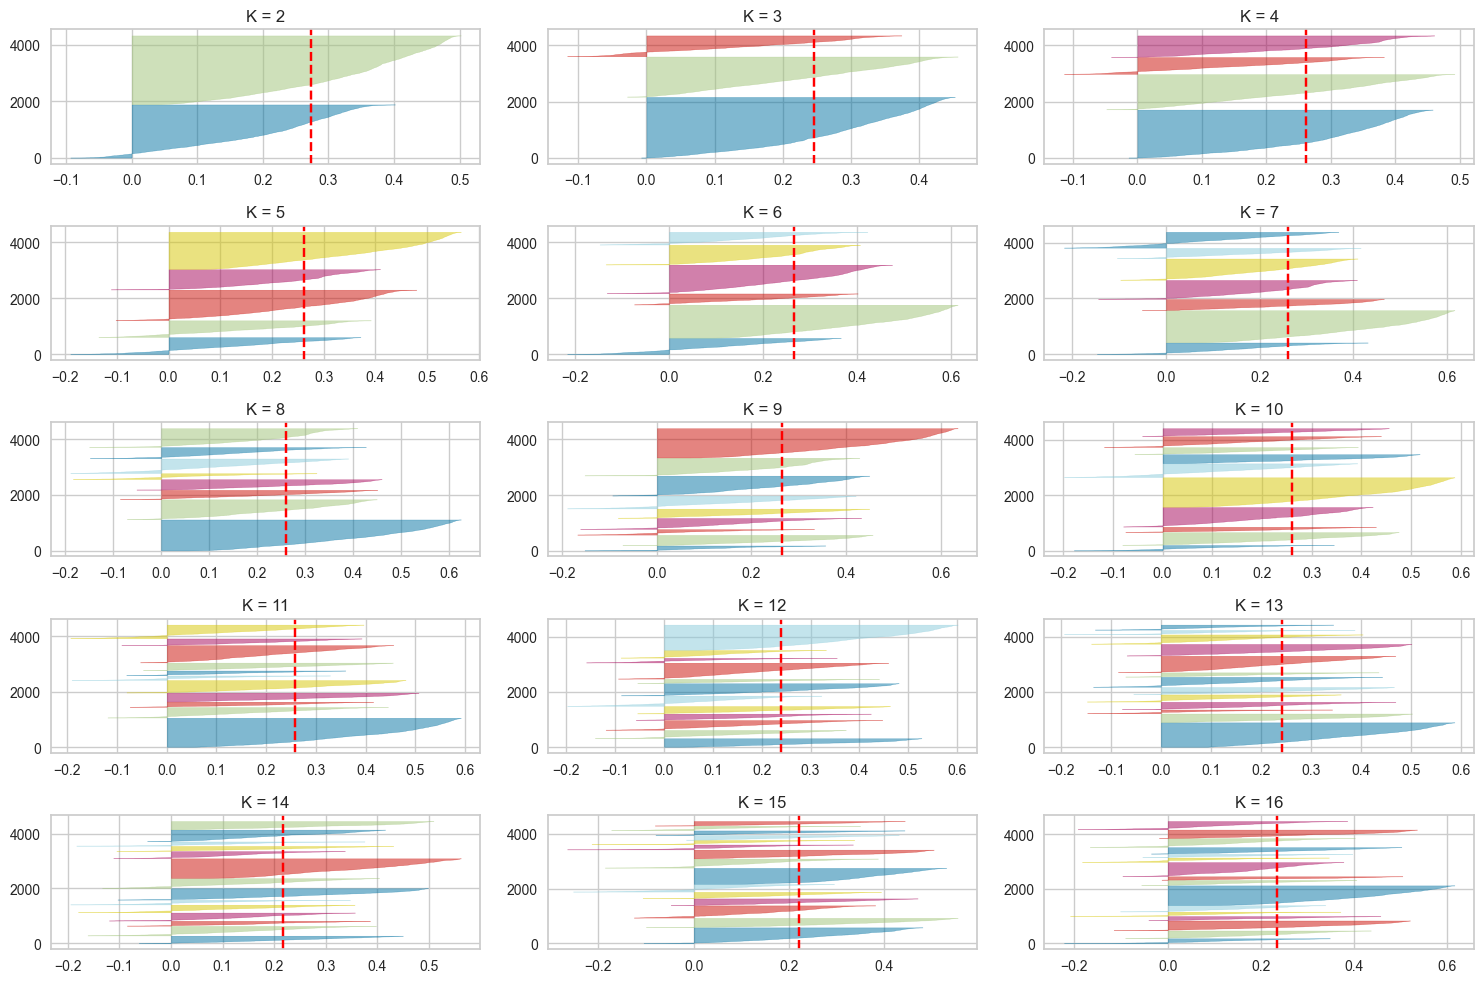

In [54]:
# Display the Silhouette Score and Plot Silhouette Plot
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(scaling_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

nilai silhouette score tertinggi adalah k=2,kemudian dilihat dari silhouette plot dan visualisasi data clustering terbaik adalah 3 karena cluster terdapat sedikit data cluster 1 yang masuk kedalam data cluster 2 dan data cluster 0 yang masuk pada data cluster 1 tetapi itu hanya sedikit dibandingkan dengan k=2 yang mempunyai banyak data cluster 0 yang masuk kedalam data cluster 1.Hal ini yang menjadi pertimbangan saya mengapa saya tidak mengambil k=2 dan menurut elbow k=5 saya tolak karena banyak sekali cluster data yang masuk kedalam cluster lain.

# 8. Model Training

- Final dengan K= 3

In [55]:
# Train with optimal number of clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
pred = km.fit_predict(scaling_pca)
pred

array([0, 0, 0, ..., 2, 0, 1])

In [56]:
km.n_iter_

17

18 iterasi konvergen, ini berarti bahwa dalam proses klasterisasi data, pusat-pusat klaster dan anggota klaster telah dihitung ulang dan diperbarui sebanyak 18 kali

In [57]:
# Insert clustering result into original dataset

new_data['cluster'] = pred
new_data.head(10)

,bal,bf,pur,op,ip,ca,pf,opf,pif,caf,cat,pt,cl,pay,mp,pfp,ten,cluster
1,943.584041,0.875000,103.00,103.0,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.325023,410.484825,0.000000,8,0
3,461.455720,1.000000,585.00,585.0,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,258.032630,151.696433,0.000000,8,0
4,1053.594730,1.000000,1450.00,1450.0,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,397.090516,227.143184,0.000000,8,0
5,2237.238086,1.000000,120.00,120.0,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2500.0,343.102984,712.986387,0.000000,8,0
7,424.994385,0.375000,1200.00,1200.0,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,57.266292,56.720210,0.000000,8,0
9,0.004816,0.545455,51.70,0.0,51.70,0.0,0.250,0.000,0.25,0.0,0,3,3000.0,33.249088,0.059481,0.000000,12,0
10,867.728471,1.000000,41.07,0.0,41.07,0.0,0.250,0.000,0.25,0.0,0,3,3000.0,1409.282903,233.788637,0.000000,12,0
11,41.255670,0.454545,297.40,297.4,0.00,0.0,0.250,0.250,0.00,0.0,0,5,6000.0,595.460601,173.255085,0.333333,12,0
12,857.767403,1.000000,639.56,0.0,639.56,0.0,0.250,0.000,0.25,0.0,0,4,2200.0,210.272469,254.976679,0.000000,12,0
13,5850.172900,1.000000,393.87,0.0,393.87,0.0,0.250,0.000,0.25,0.0,0,8,6000.0,1536.774213,2668.340809,0.000000,12,0


## EDA CLUSTER

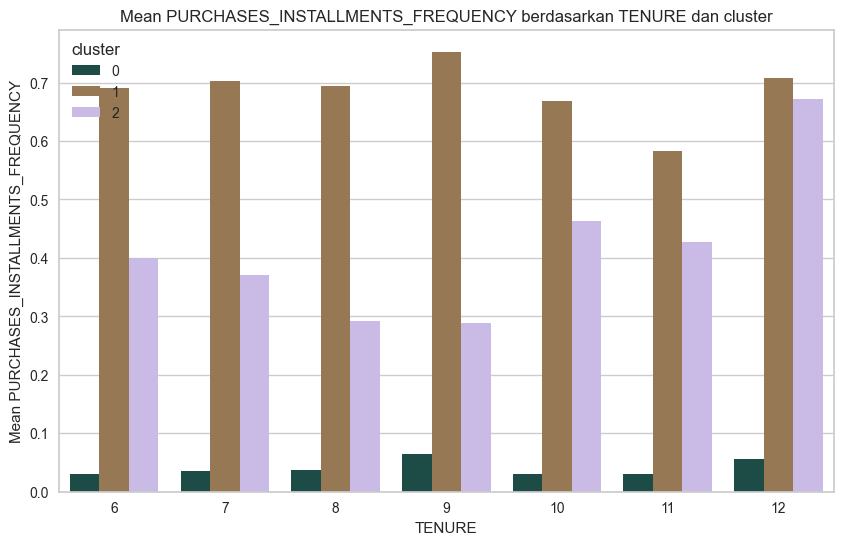

In [59]:
# Melihat nilai mean PURCHASES_INSTALLMENTS_FREQUENCY untuk setiap nilai TENURE dan cluster
mean_purchases_installments_frequency = new_data.groupby(["ten", "cluster"])["pif"].mean().reset_index()

# Membuat barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_purchases_installments_frequency, x="ten", y="pif", hue="cluster", palette="cubehelix")
plt.title('Mean PURCHASES_INSTALLMENTS_FREQUENCY berdasarkan TENURE dan cluster')
plt.xlabel('TENURE')
plt.ylabel('Mean PURCHASES_INSTALLMENTS_FREQUENCY')
plt.show()

*Kesimpulan*:
* Terlihat bahwa dari dari EDA sebelum clustering bahwa pelanggan dengan rata-rata terbesar yang sering melakukan pembelian dengan cicilan mempunyai masa kepemilikan layanan kartu kredit untuk pengguna selama 12 bulan.Tetapi ketika kita sudah melakukan clustering terlihat bahwa pelanggan pada cluster 1 mempunyai rata-rata besar yang sering melakukan pembelian dengan cicilan ,kemudian pada cluster 0 pelanggan jarang sekali melakukan pembelian dengan cicilan. Dan pada cluster 2 mempunyai rata-rata terbesar pada tenure 12 bulan di cluster ini.

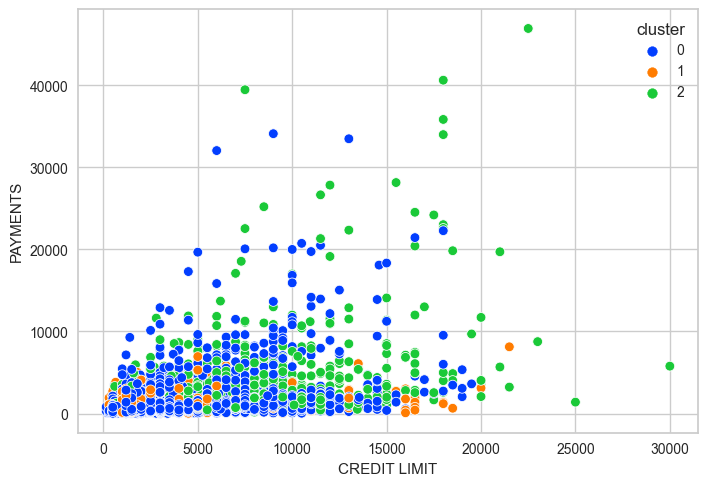

In [68]:
sns.scatterplot(data=new_data, x="cl", y="pay", hue="cluster",palette="bright")
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PAYMENTS')
plt.show()

In [67]:
new_data.groupby(['cluster']).agg({'cl': 'mean','pay': 'mean'})

,cl,pay
cluster,,
0,4156.267409,1572.539451
1,3490.206918,935.555895
2,7589.014639,4044.619405


*Kesimpulan*
* Setiap kluster memiliki karakteristik yang berbeda dalam hal batas kredit ('CREDIT_LIMIT') dan jumlah pembayaran yang dikeluarkan ('PAYMENTS'). Cluster 0 memiliki batas kredit yang lebih rendah dengan jumlah pembayaran yang rendah hingga sedang. Cluster 1 memiliki batas kredit sedang dengan jumlah pembayaran yang lebih tinggi. Cluster 2 memiliki batas kredit yang tinggi dengan jumlah pembayaran yang sangat tinggi.

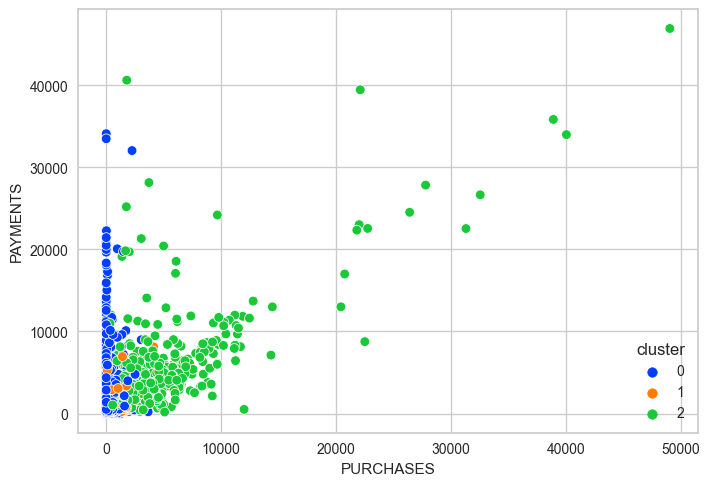

In [69]:
sns.scatterplot(data=new_data, x="pur", y="pay", hue="cluster",palette="bright")
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.show()

In [65]:
new_data.groupby(['cluster']).agg({'pur': 'mean','pay': 'mean'})

,pur,pay
cluster,,
0,248.347266,1572.539451
1,736.005334,935.555895
2,3846.829811,4044.619405


*Kesimpulannya*
* Setiap kluster memiliki karakteristik yang berbeda dalam hal jumlah pembelian ('PURCHASES') dan jumlah pembayaran ('PAYMENTS'). Cluster 0 memiliki rata-rata pembelian tinggi dengan pembayaran yang relatif rendah, cluster 1 memiliki pembelian rendah dengan pembayaran tinggi, dan cluster 2 memiliki pembelian dan pembayaran tinggi.

## Kesimpulan Clustering

Kluster 0: Pelanggan dalam kluster ini aktif menggunakan cicilan dengan pembayaran kecil. Rekomendasi untuk mereka adalah meningkatkan penggunaan cicilan dengan menawarkan program cicilan menarik seperti bunga rendah atau promo khusus, serta mengirim penawaran produk yang relevan.

Kluster 1: Pelanggan dalam kluster ini jarang menggunakan cicilan tetapi memiliki pembayaran tinggi. Strategi pemasaran harus difokuskan pada mendorong mereka untuk menggunakan cicilan dengan memberikan insentif seperti diskon atau cashback.

Kluster 2: Pelanggan dalam kluster ini aktif menggunakan cicilan dengan pembayaran besar. Mereka mungkin pelanggan berharga, jadi disarankan untuk menjaga mereka dengan penawaran eksklusif dan insentif yang memotivasi penggunaan cicilan. Pertimbangkan juga untuk memperluas layanan cicilan untuk memenuhi kebutuhan mereka.

# 9. Model Evaluation

In [61]:
km.inertia_

3624.8135746087473

Terlihat bahwa nilai inertia pada kluster saya sebesar 3624.8135746087473.Pada konsep teorinya semakin kecil nilai intertia /SSE maka semakin bagus cluster kita,tetapi hal ini tidak menjadi 1 persyaratan khusus kita bisa melihat dari faktor-faktor lain untuk mengetahui apakah cluster kita baik atau buruk.

# 10. Model Saving

In [70]:
# Untuk menyimpan model kita menggunakan module pickle

with open('model_scaler_cluster.pkl', 'wb') as file_1:
  pickle.dump(scale, file_1) # ini agar di ipynb data inference kita tinggal transform saja

with open('model_kmeans.pkl', 'wb') as file_2:
  pickle.dump(km, file_2) # ini agar di ipynb data inference kita tinggal transform saja

with open('model_pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3) # ini agar di ipynb data inference kita tinggal transform saja

## Conceptual Problem

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

    Inertia adalah sebuah formula `WCSS(Within-Cluster Sum of Squares)` merupakan jumlah kuadrat jarak antara setiap titik data dalam sebuah K(cluster) dengan kata lain inertia adalah total jarak data ke pusat cluster(`Centorid`). Semakin kecil inertia maka semakin baik K-Means, ketika menambah lagi cluster inertia akan semakin kecil atau berkurang dan untuk menentukan cluster yang sesuai kita menggunakan Elbow Method untuk membandingkan jumlah kluster dengan inertianya.

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
    
    Elbow Method adalah membandingkan jumlah kluster dengan inertia dengan visualisasi dan dilihat dari titik siku `elbow.` Digunakan untuk menentukan jumlah optimal cluster (K) dalam K-Means agar cluster dapat mengelompokkan data dengan fit dengan cara:
    - Menjalankan K-Means dengan berbagai K (misalnya, K=1 hingga K=10).
    - Menghitung nilai inertia (WCSS) untuk setiap K.
    - Membuat grafik K (sumbu x) vs. inertia (sumbu y).
    - Mencari titik "siku" di grafik yang menandakan penurunan inertia yang melambat, menunjukkan jumlah cluster optimal.

* Kelebihannya: cara sederhana dan memberikan pandangan visual bagaimana K mempengaruhi inertia.
* Kelemahannya: tidak selalu ada siku jelas, kurang akurat untuk data non-spherical, dan hanya mempertimbangkan inertia tanpa faktor lain dalam data.